In [54]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt


In [55]:
df= pd.read_csv("troll.csv")

In [56]:
df

,content,annotation/notes,annotation/label/0,extras
0,Get fucking real dude.,NaN,1,NaN
1,She is as dirty as they come and that crook ...,NaN,1,NaN
2,why did you fuck it up. I could do it all day...,NaN,1,NaN
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,NaN,0,NaN
19997,Bahah yeah i&;m totally just gonna&; get pis...,NaN,0,NaN
19998,hahahahaha >:) im evil mwahahahahahahahahaha,NaN,0,NaN
19999,What&;s something unique about Ohio? :),NaN,0,NaN


# Pre-Processing

In [57]:
df.drop(["annotation/notes","extras"],axis=1,inplace=True)


In [58]:
df

,content,annotation/label/0
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [59]:
df.head(5)

,content,annotation/label/0
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [28]:
df.isnull().sum()

content               0
annotation/label/0    0
dtype: int64

In [60]:
df=df.rename(columns={'annotation/label/0':'label'})
index_to_remove = 0 
df = df.drop(index_to_remove)

In [61]:
df

,content,label
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
5,Ill save you the trouble sister. Here comes a ...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [62]:
for column in df.columns:
    print(column, df[column].unique())
    print('-'*40)

content [" She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ..."
 " why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here."
 ' Dude they dont finish enclosing the fucking showers. I hate half assed jobs. Whats the reasononing behind it? Makes no sense.'
 ... '  hahahahaha >:) im evil mwahahahahahahahahaha'
 ' What&;s something unique about Ohio? :)'
 ' Who is the biggest gossiper you know?']
----------------------------------------
label [1 0]
----------------------------------------


# Data Visualization

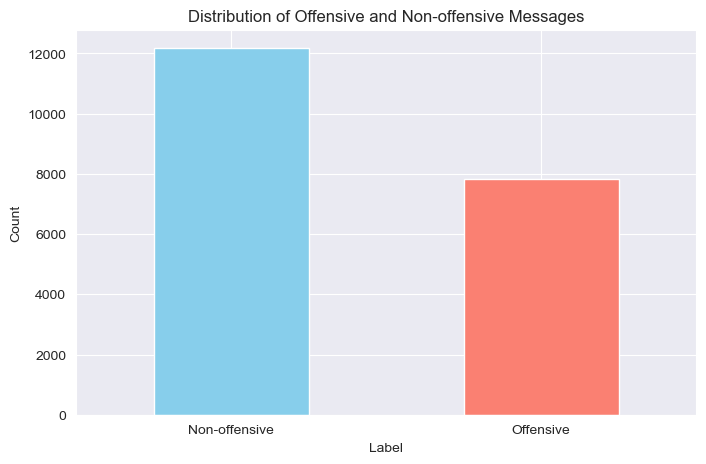

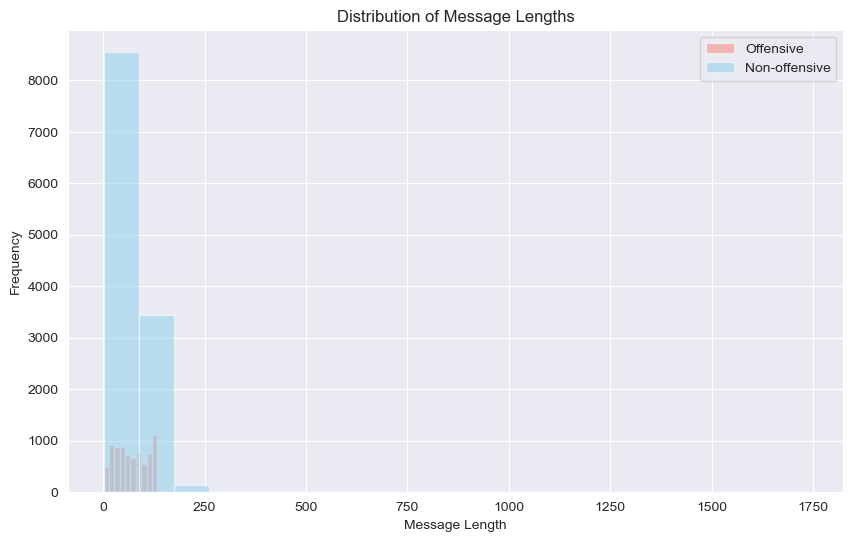

In [35]:
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Offensive and Non-offensive Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-offensive', 'Offensive'], rotation=0)
plt.show()

#histogram
df['message_length'] = df['content'].apply(len)
plt.figure(figsize=(10, 6))
df[df['label'] == 1]['message_length'].plot(kind='hist', alpha=0.5, color='salmon', bins=20, label='Offensive')
df[df['label'] == 0]['message_length'].plot(kind='hist', alpha=0.5, color='skyblue', bins=20, label='Non-offensive')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

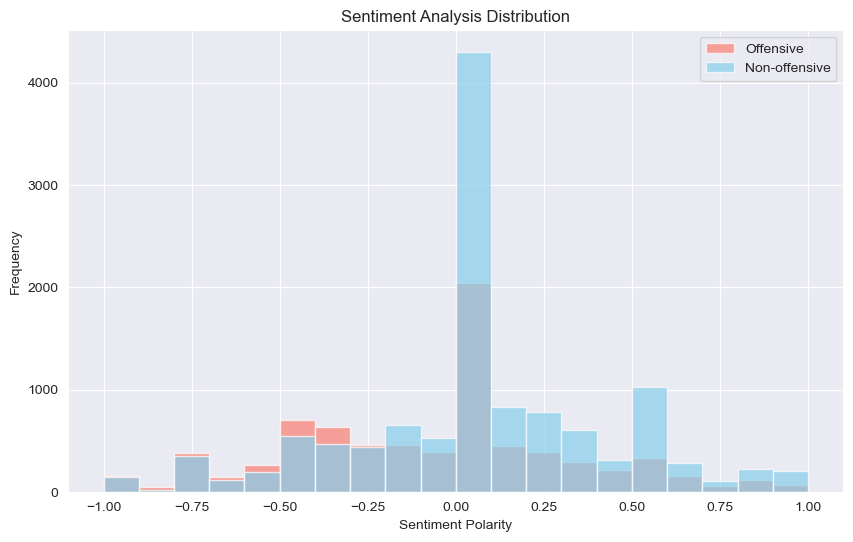

In [36]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the entire dataset
df['sentiment_polarity'] = df['content'].apply(get_sentiment_polarity)

# Visualization 7: Sentiment Analysis Distribution
plt.figure(figsize=(10, 6))
plt.hist(df[df['label'] == 1]['sentiment_polarity'], bins=20, color='salmon', alpha=0.7, label='Offensive')
plt.hist(df[df['label'] == 0]['sentiment_polarity'], bins=20, color='skyblue', alpha=0.7, label='Non-offensive')
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [63]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['content'])
y = df['label']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

names = [
    "Decision Tree",
    "Logistic Regression",
    "Support Vector Machine",
    "Random Forest"]
    
models = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    
    
]


In [65]:
accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac*100)
    accuracy.append(ac)
    print('='*100)


Confusion matrix of  Decision Tree
[[1939  486]
 [  70 1505]]
Accuracy score is  86.1
Confusion matrix of  Logistic Regression
[[1987  438]
 [ 631  944]]
Accuracy score is  73.275
Confusion matrix of  Support Vector Machine
[[2111  314]
 [ 195 1380]]
Accuracy score is  87.275
Confusion matrix of  Random Forest
[[2061  364]
 [  66 1509]]
Accuracy score is  89.25


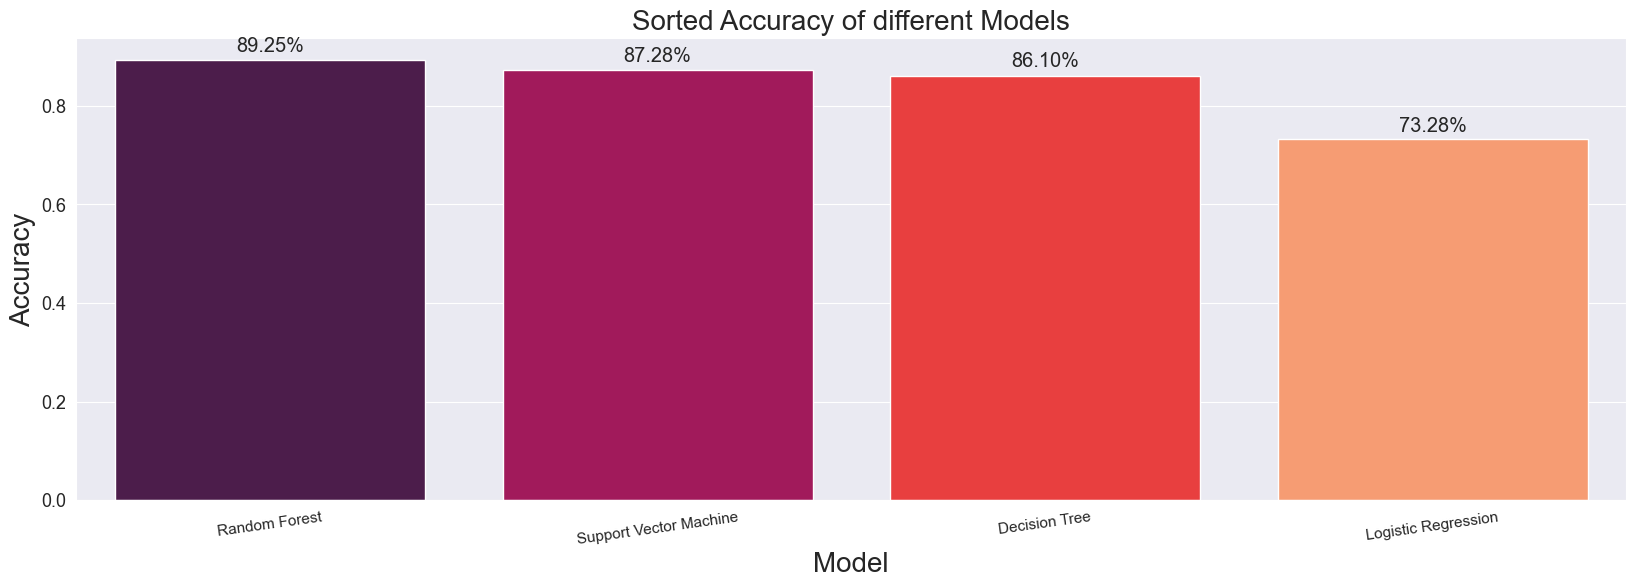

In [66]:

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Sorted Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Saving trained model 

In [67]:
import joblib
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [68]:
model = joblib.load('trained_model.pkl')
model

RandomForestClassifier()

# Checking Comment is trolling or not 

In [75]:
new_comment = input("Enter Comment:")
new_comment_features = tfidf_vectorizer.transform([new_comment])

prediction = model.predict(new_comment_features)
if prediction == 1:
    print("The comment is trolling.")
else:
    print("The comment is not trolling.")


Enter Comment:karama is a bitch
The comment is trolling.


In [70]:
new_comment = input("Enter Comment:")
new_comment_features = tfidf_vectorizer.transform([new_comment])
prediction = model.predict(new_comment_features)
if prediction == 1:
    print("The comment is trolling.")
else:
    print("The comment is not trolling.")

Enter Comment:hello how are you
The comment is not trolling.


# accuracy vs threshold 

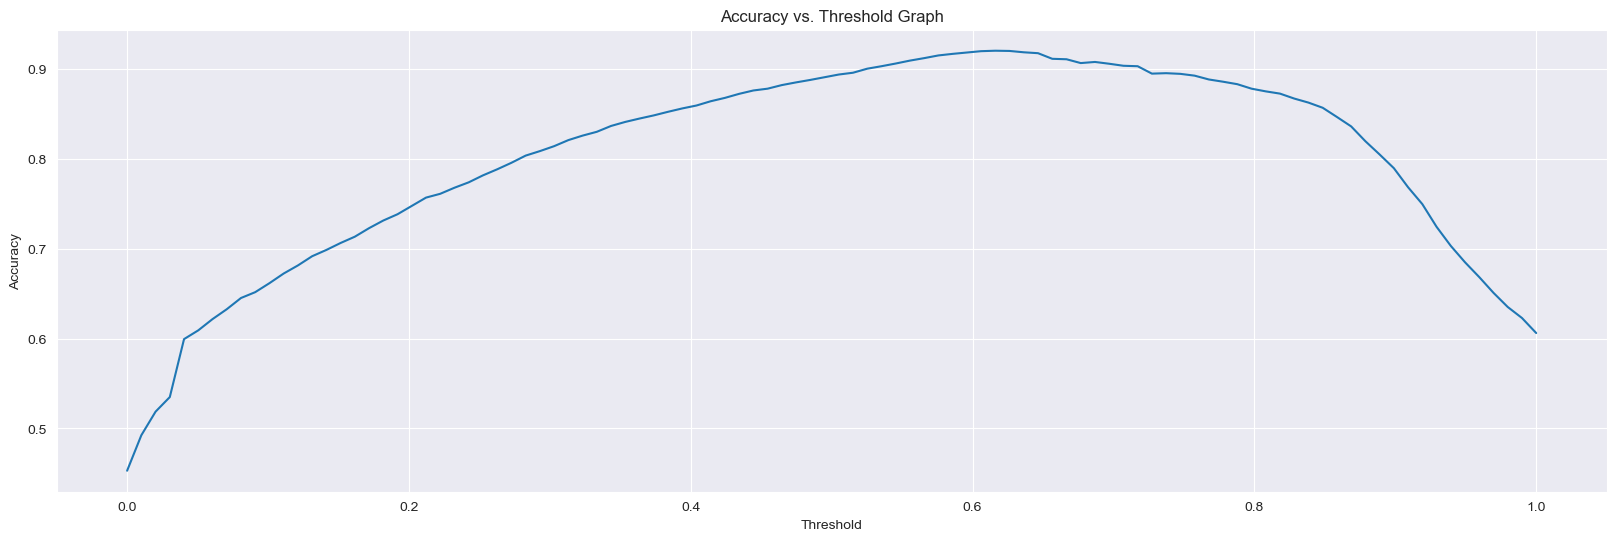

In [71]:
thresholds = np.linspace(0.0, 1.0, 100)
accuracy = []
for threshold in thresholds:
    y_pred = model.predict_proba(X_test)[:, 1] > threshold
    accuracy.append(np.sum(y_pred == y_test) / len(y_test))

# Plot the accuracy vs. threshold graph
plt.plot(thresholds, accuracy)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Threshold Graph")
plt.show()


# precision vs. threshold

C:\Users\vineet\AppData\Local\Temp\ipykernel_13128\2502833966.py:5: RuntimeWarning: invalid value encountered in long_scalars
  precision.append(np.sum(y_pred[y_test == 1]) / np.sum(y_pred))


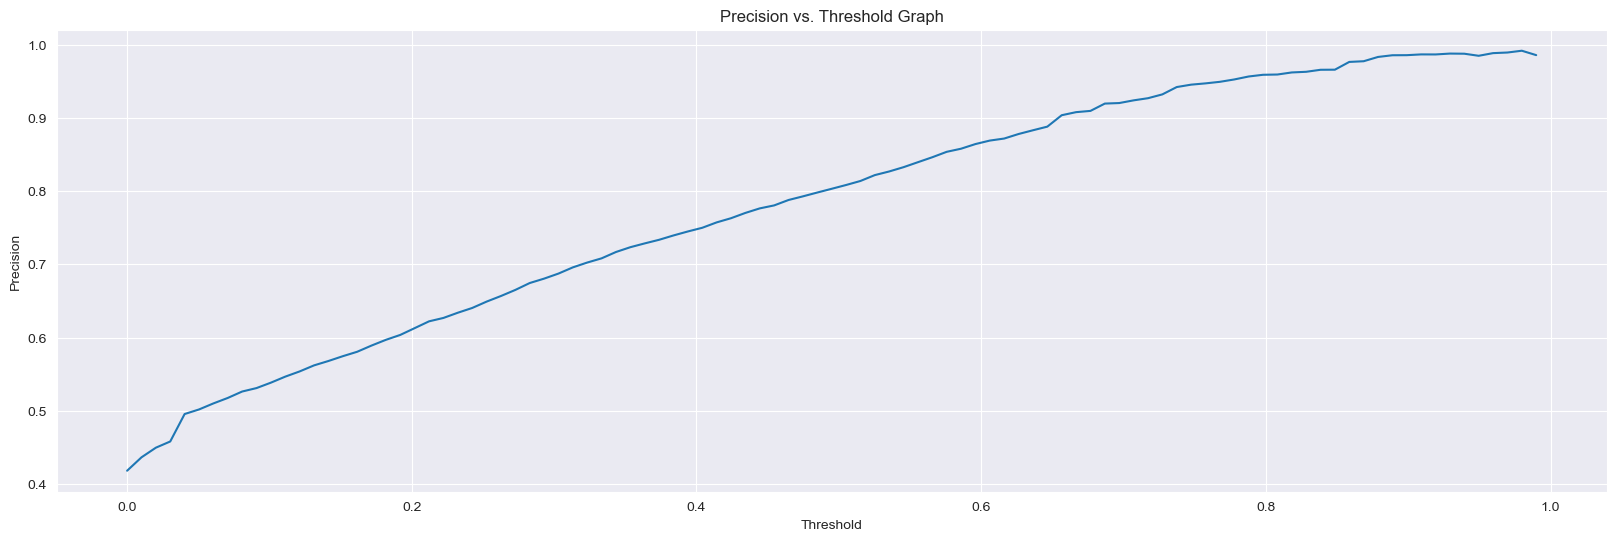

In [72]:
thresholds = np.linspace(0.0, 1.0, 100)
precision = []
for threshold in thresholds:
    y_pred = model.predict_proba(X_test)[:, 1] > threshold
    precision.append(np.sum(y_pred[y_test == 1]) / np.sum(y_pred))

# Plot the precision vs. threshold graph
plt.plot(thresholds, precision)
plt.xlabel("Threshold")
plt.ylabel("Precision")
plt.title("Precision vs. Threshold Graph")
plt.show()

# roc curve

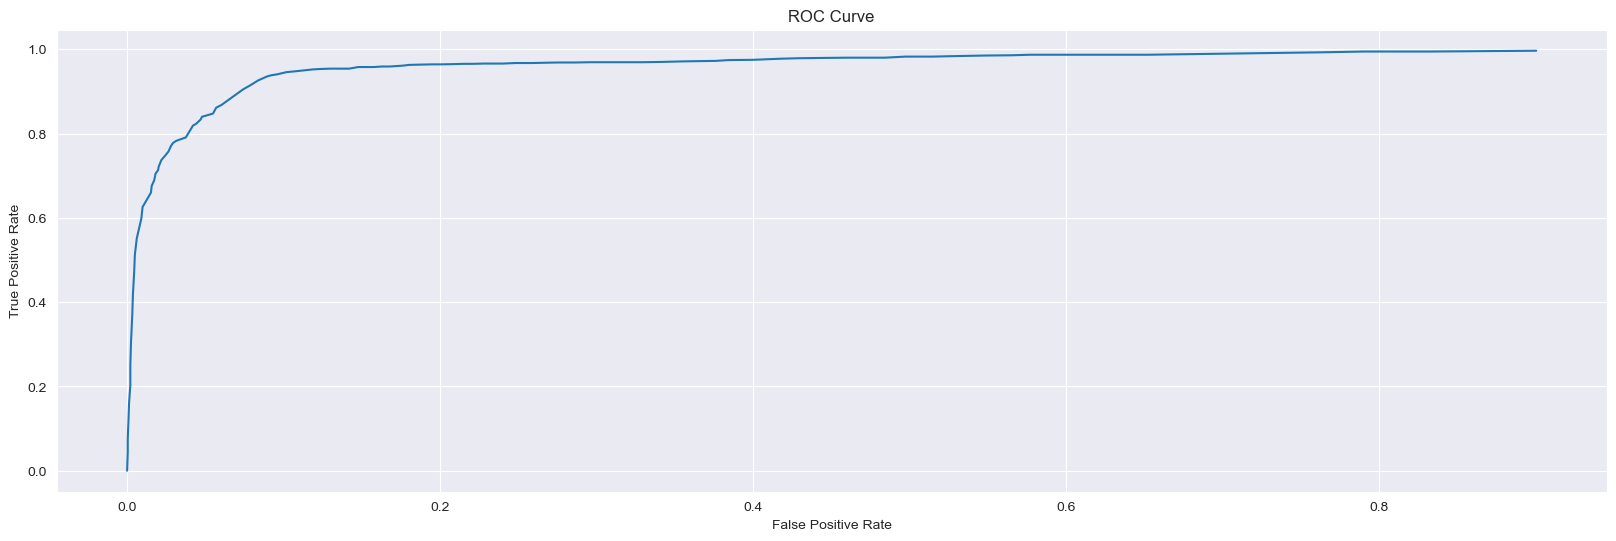

In [73]:
thresholds = np.linspace(0.0, 1.0, 100)
tpr = []
fpr = []
for threshold in thresholds:
    y_pred = model.predict_proba(X_test)[:, 1] > threshold
    tpr.append(np.sum(y_pred[y_test == 1]) / np.sum(y_test == 1))
    fpr.append(np.sum(y_pred[y_test == 0]) / np.sum(y_test == 0))

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [80]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2425
           1       0.81      0.96      0.88      1575

    accuracy                           0.89      4000
   macro avg       0.89      0.90      0.89      4000
weighted avg       0.90      0.89      0.89      4000

